In [2]:
import pandas as pd

# Load the CSV file to examine its structure
file_path = '/home/jovyan/MyFolder/Project/samples_samll_no_phi_delta14_33.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the format
data.head(), data.shape

(      beta0  beta_LUT  beta_Humid  beta_TEMP     alpha
 0 -6.595175  0.007425   -0.058221   0.164637 -0.620065
 1 -6.596376  0.007390   -0.058201   0.164654 -0.624116
 2 -6.589062  0.007413   -0.058232   0.164375 -0.631495
 3 -6.580910  0.007491   -0.058270   0.164169 -0.632129
 4 -6.581171  0.007485   -0.058270   0.164185 -0.632285,
 (3000, 5))

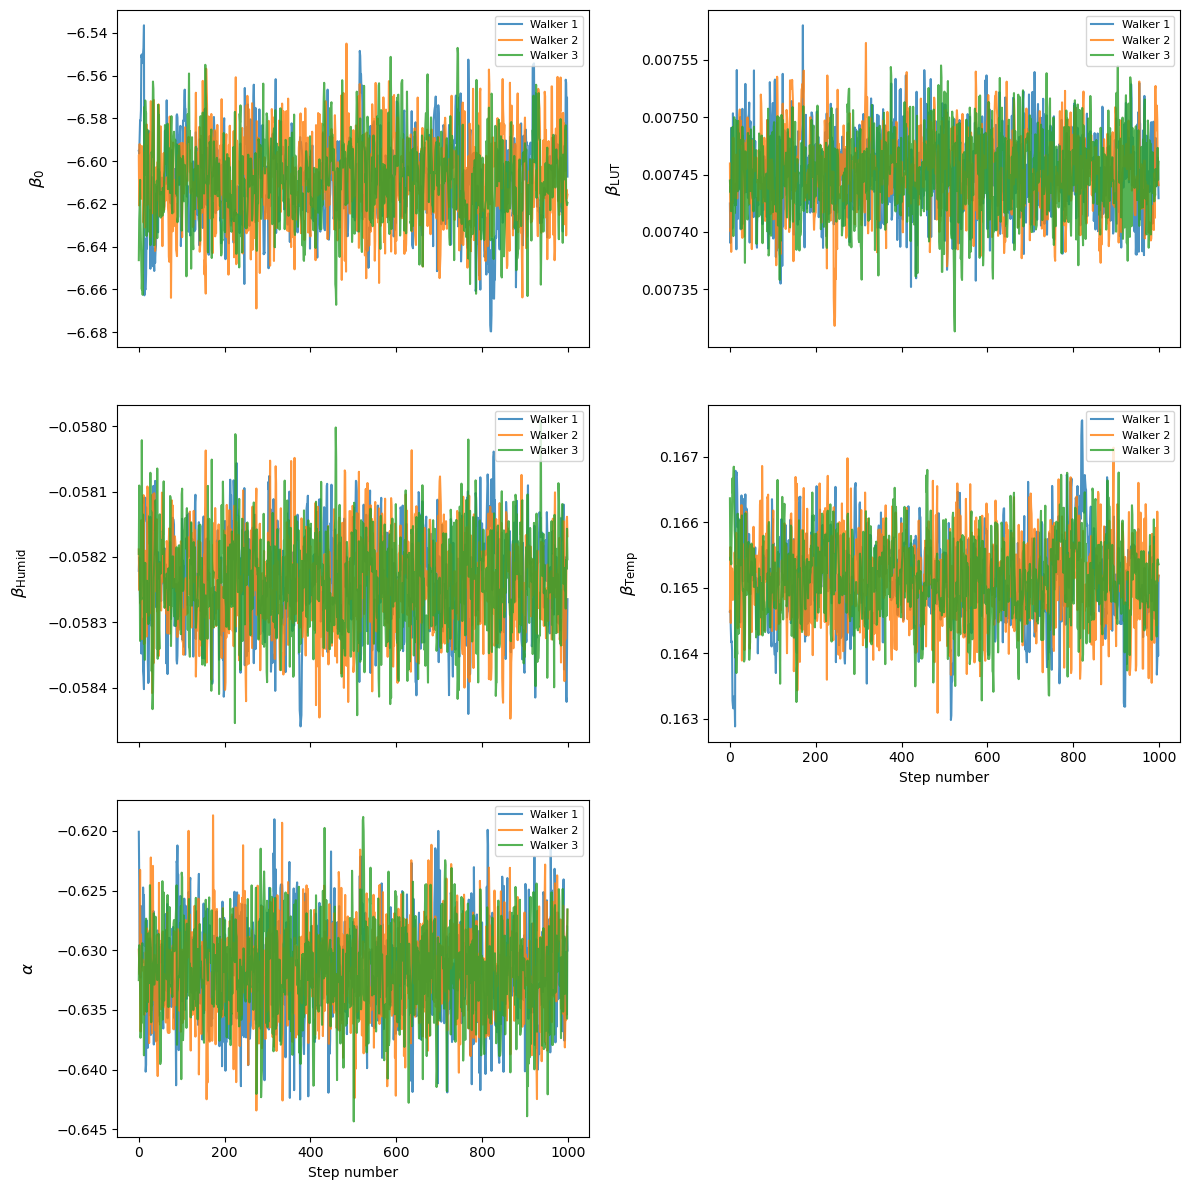

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Extract samples and split by walkers
num_walkers = 3
samples_per_walker = 1000

# Splitting data for each walker
walkers = [
    data.iloc[i * samples_per_walker : (i + 1) * samples_per_walker].reset_index(drop=True)
    for i in range(num_walkers)
]

# Labels for the plots
labels = [
    r"$\beta_0$", r"$\beta_{\text{LUT}}$", r"$\beta_{\text{Humid}}$", r"$\beta_{\text{Temp}}$",
    r"$\alpha$", r"$\rho_{\text{int}}$", r"$\rho_{\text{slo}}$",
    r"$\tau_{\text{int}}$", r"$\tau_{\text{slo}}$"
]

# Create plots
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
axes = axes.flatten()

# Parameter names corresponding to column names
param_names = ['beta0', 'beta_LUT', 'beta_Humid', 'beta_TEMP', 'alpha',]

# Plotting each parameter
for idx, ax in enumerate(axes):
    if idx < len(param_names):
        param = param_names[idx]
        for i, walker_data in enumerate(walkers):
            ax.plot(walker_data[param], label=f'Walker {i + 1}', alpha=0.8)
        ax.set_ylabel(labels[idx], rotation=90, labelpad=20, fontsize=12, va='center')
        ax.legend(fontsize=8, loc='upper right')
    else:
        ax.axis('off')  # Hide unused axes

# Shared x-label for bottom plots
axes[-3].tick_params(axis='x', which='both', bottom=True, labelbottom=True)
axes[-3].set_xlabel("Step number")
axes[-2].set_xlabel("Step number")

plt.tight_layout()
fig.savefig("sampling_small.png", format="png")
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Load the data
file_path = '/home/jovyan/MyFolder/Project/samples_samll_no_phi_delta14_33.csv'
data = pd.read_csv(file_path)

# Remove the last walker (last 1000 samples)
data_trimmed = data.iloc[:-1000]

# Define a function to calculate the mean and 95% confidence interval
def calculate_statistics(samples):
    mean = np.mean(samples)
    lower, upper = np.percentile(samples, [2.5, 97.5])  # 95% confidence interval
    return mean, (lower, upper)

# Iterate over each parameter and calculate statistics
results = {}
for column in data_trimmed.columns:
    mean, conf_interval = calculate_statistics(data_trimmed[column])
    results[column] = {"mean": mean, "95% CI": conf_interval}

# Print the results
for param, stats in results.items():
    print(f"{param}: Mean = {stats['mean']:.4f}, 95% CI = [{stats['95% CI'][0]:.4f}, {stats['95% CI'][1]:.4f}]")

beta0: Mean = -6.6091, 95% CI = [-6.6490, -6.5683]
beta_LUT: Mean = 0.0075, 95% CI = [0.0074, 0.0075]
beta_Humid: Mean = -0.0582, 95% CI = [-0.0584, -0.0581]
beta_TEMP: Mean = 0.1651, 95% CI = [0.1639, 0.1664]
alpha: Mean = -0.6317, 95% CI = [-0.6390, -0.6242]


Number of parameters after trimming: 5


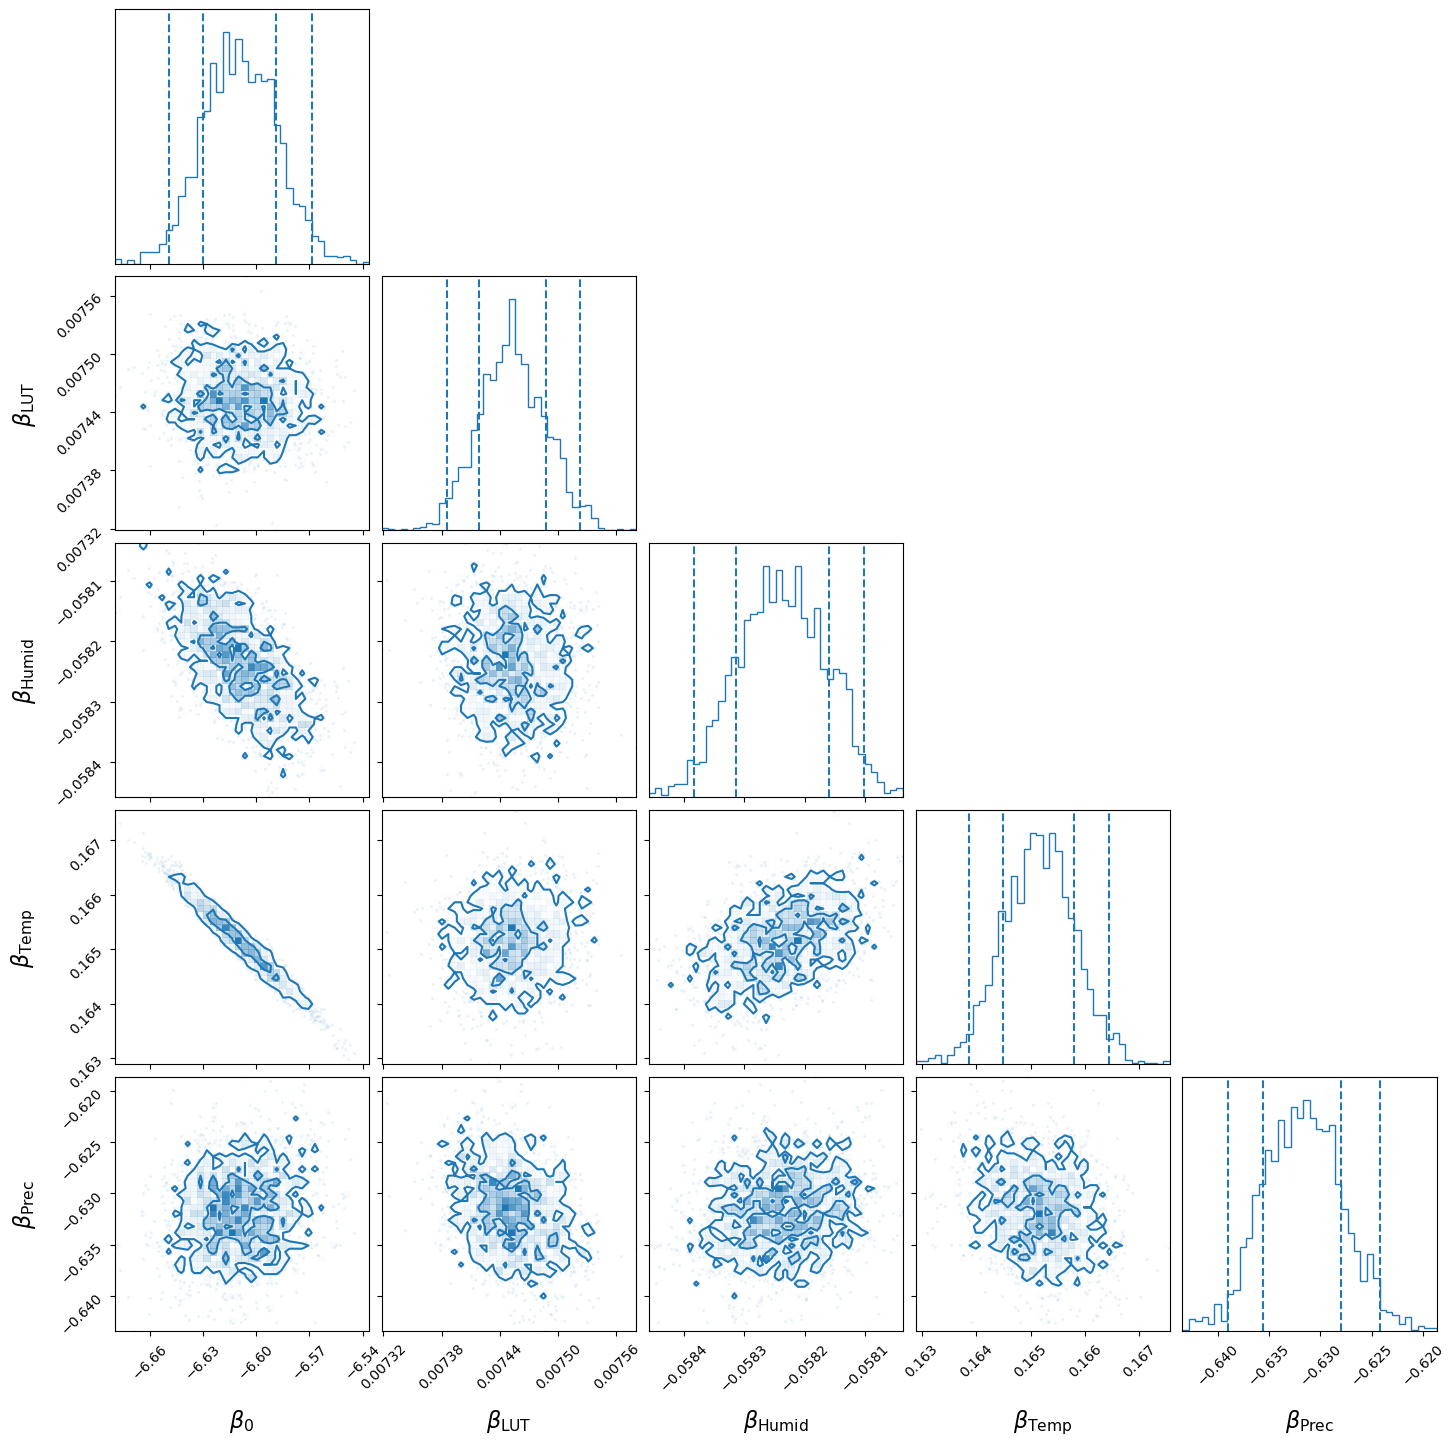

beta0        -6.609087
beta_LUT      0.007452
beta_Humid   -0.058238
beta_TEMP     0.165143
alpha        -0.631702
dtype: float64

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

# Load the CSV file
file_path = '/home/jovyan/MyFolder/Project/samples_samll_no_phi_delta14_33.csv'
data = pd.read_csv(file_path)

# Remove the last walker's data (last 1000 points)
data_trimmed = data.iloc[:-1000].copy()


# Save the cleaned and reduced data for reference (optional)
np.savetxt("samples_big_no_phi_delta11_01_cleaned_reduced.csv", data_trimmed.values, delimiter=",")

# Calculate parameter means for the trimmed data
params_means_trimmed = data_trimmed.mean(axis=0)
print("Number of parameters after trimming:", len(params_means_trimmed))

# Update labels to exclude `rho_slo` and `rho_int`
labels_reduced = [
    r"$\beta_0$", r"$\beta_{\text{LUT}}$", r"$\beta_{\text{Humid}}$", r"$\beta_{\text{Temp}}$",
    r"$\beta_{\text{Prec}}$", r"$\beta_{\text{Speed}}$", r"$\alpha$",
    r"$\tau_{\text{int}}$", r"$\tau_{\text{slo}}$"
]

# Create the corner plot
fig = plt.figure(figsize=(15, 15))
fig = corner.corner(
    data_trimmed.values, bins=40, labels=labels_reduced, color="C0",
    levels=1-np.exp(-0.5*np.array([1, 2])**2),
    quantiles=[0.025, 0.16, 0.84, 0.975],
    fig=fig, label_kwargs={"fontsize": 16}
)

# Add a legend
fig.get_axes()[0].plot([], [], c="C0", label="Samples from the posterior")
fig.savefig("corner_small_reduced.png", format="png")

plt.show()

params_means_trimmed
